In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import csv
import io

In [2]:
# df = pd.read_csv("./Resources/insurance_claims.csv")

# # Drop the null columns where all values are null
# df = df.dropna(axis='columns', how='all')
# # Drop the null rows
# df = df.dropna()
# df.head()

In [3]:
# df.columns

In [4]:
# df = pd.read_csv("exoplanet_data.csv")
df = pd.read_csv("./Resources1/claims_accident_pgsql.csv")
# Drop the null columns where all values are null
df1 = df.dropna(axis='columns', how='all')
# Drop the null rows
# df = df.dropna()
df.head()

,age,auto_year,incident_hour_of_the_day,number_of_vehicles_involved,visibility,temperature,humidity,wind_speed,precipitation
0,48,2004,5,1,10.0,76.0,62.0,3.0,0.0
1,42,2007,8,1,10.0,51.0,80.0,6.0,0.0
2,29,2007,7,3,10.0,53.6,16.0,4.6,NaN
3,41,2014,5,1,10.0,84.2,84.0,13.8,NaN
4,44,2009,20,1,10.0,73.4,33.0,6.9,NaN


In [7]:
# Set features. This will also be used as your x values.
training_selected_features = df[['age', 'auto_year',	'incident_hour_of_the_day', 'number_of_vehicles_involved',	'visibility',	'temperature',	'humidity',	'wind_speed',	'precipitation']].dropna()

training_selected_features

,age,auto_year,incident_hour_of_the_day,number_of_vehicles_involved,visibility,temperature,humidity,wind_speed,precipitation
0,48,2004,5,1,10.0,76.0,62.0,3.0,0.0
1,42,2007,8,1,10.0,51.0,80.0,6.0,0.0
5,39,2003,19,3,2.0,28.0,88.0,3.0,0.0
6,34,2012,0,3,10.0,55.0,40.0,5.0,0.0
8,33,2012,21,1,5.0,57.0,77.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...
990,43,2013,18,1,10.0,79.0,54.0,9.0,0.0
993,28,2012,20,3,10.0,38.0,86.0,0.0,0.0
994,30,1996,6,1,4.0,19.0,92.0,9.2,0.0
997,34,1996,4,3,10.0,67.0,61.0,7.0,0.0


Creating a Train Test Split
Using koi_disposition for the y values

In [8]:
X = training_selected_features
y = training_selected_features['auto_year']
print(X.shape, y.shape)

(549, 9) (549,)


In [9]:
# Using train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Train the Model

In [10]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
training_score = clf.score(X_train, y_train)
testing_score = clf.score(X_test, y_test)

In [11]:
print(f"Training Data Score: {training_score}")
print(f"Testing Data Score: {testing_score}")

Training Data Score: 1.0
Testing Data Score: 1.0


In [12]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [14]:
sorted(zip(clf.feature_importances_, training_selected_features), reverse=True)

[(1.0, 'auto_year'),
 (0.0, 'wind_speed'),
 (0.0, 'visibility'),
 (0.0, 'temperature'),
 (0.0, 'precipitation'),
 (0.0, 'number_of_vehicles_involved'),
 (0.0, 'incident_hour_of_the_day'),
 (0.0, 'humidity'),
 (0.0, 'age')]

In [15]:
# Making predictions with the model
predictions = clf.predict(X_test)

In [16]:
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test.tolist()}).reset_index(drop=True)
results

,Prediction,Actual
0,1997,1997
1,2012,2012
2,2006,2006
3,2002,2002
4,2000,2000
...,...,...
133,2005,2005
134,2008,2008
135,2015,2015
136,2010,2010


In [17]:
results.head(10)

,Prediction,Actual
0,1997,1997
1,2012,2012
2,2006,2006
3,2002,2002
4,2000,2000
5,2002,2002
6,2013,2013
7,2000,2000
8,2011,2011
9,1995,1995


In [18]:
results.tail(10)

,Prediction,Actual
128,2004,2004
129,1997,1997
130,1997,1997
131,2004,2004
132,2010,2010
133,2005,2005
134,2008,2008
135,2015,2015
136,2010,2010
137,2005,2005


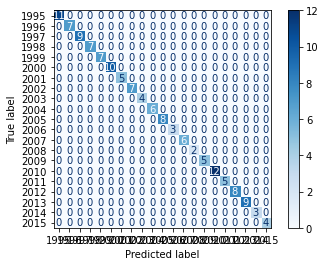

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap="Blues")
plt.show()

Text(0.5, 1.0, 'Residual Plot')

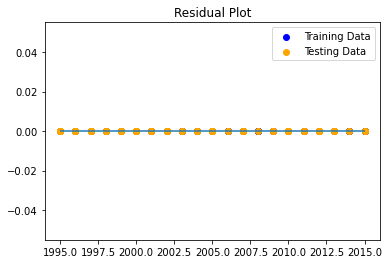

In [24]:
plt.scatter(clf.predict(X_train), clf.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(clf.predict(X_test), clf.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [25]:
# saving the model by updating "your_name" with Adebayo
# and "your_model" with your model variable
# if joblib fails to import, will try running the command to install in terminal/git-bash
import joblib
filename = 'Adebayo_DT.sav'
joblib.dump(clf, filename)

['Adebayo_DT.sav']